## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('data/human_body_temperature.csv')

# Exploratory Data Analysis

In [4]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [5]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [6]:
df.median()

temperature    98.3
heart_rate     74.0
dtype: float64

# Q1: Is the distribution of body temperatures normal?

There are two ways to look at it: by graph or by hypothesis testing

## By Graph

In [7]:
import matplotlib
# From:https://github.com/studywolf/control/issues/1
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import numpy as np
# This line configures matplotlib to show figures embedded in the notebook,
# instead of opening a new window for each figure. 
%matplotlib inline

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


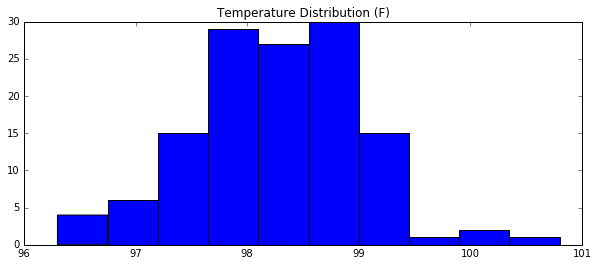

In [8]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.hist(df['temperature'])
ax.set_title("Temperature Distribution (F)")

Another alternative is to just use the pandas built-in plot function:
Use both the histogram and the kernel density estimation plot

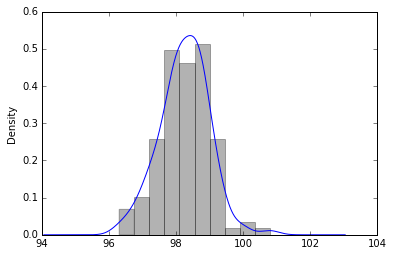

In [9]:
df['temperature'].hist(alpha=0.3,color='k',normed=True)
df['temperature'].plot(kind='kde')

## By hypothesis testing

In [10]:
import numpy as np
import numpy.ma as ma
from scipy.stats import stats

I am going to use normaltest function in scipy.stats (http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.normaltest.html). The function tests whether a sample differs from a normal distribution.

The null hypothesis:the sample comes from a normal distribution. 

In [11]:
stats.normaltest(df['temperature'])

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

The function "normaltest" comes up with two scores: the chi-squared statistics and the associated p-value.

Since the p-value is high, so we can not reject the null hypothesis that the sample comes from a normal distribution.

## From graphing and hypothesis testing result: we can safely assume that the data is normally distributed

# Q2: Is the true population mean really 98.6 degrees F?

We are going to use one-sample hypothesis testing. 

H<sub>o</sub> (null hypothesis): the mean is not 98.6; it is 98.2 degrees F instead

H<sub>1</sub> (alternative hypothesis): the mean is 98.6 degrees F

Let's assume H<sub>o</sub> is true.

We are going to use the Z-test since the number of data sample (n) >30. We can use t-test if n<30. 

In [12]:
import math
from __future__ import print_function, division

In [13]:
(df['temperature'].std()/math.sqrt(df['temperature'].count()))

0.06430441683789101

In [14]:
ztest = (df['temperature'].mean() -98.2 ) / (df['temperature'].std()/math.sqrt(df['temperature'].count()))
ztest

0.7655892340161273

Critical z-value, 95% area under the curve, corresponds to the z-value of 1.65. Since our value of z-score is 0.76, we cannot reject the null hypothesis that the mean is not 98.6. 

The computation is the same for t-test, it's just using a different t-score table. Since there are 130 data point, I will make the assumption that the degrees of freedom is 100. The critical t-value is 1.984 for two-tailed t-test. If I were to do the calculation, the average should be in between 98.123 F to 98.377 F to be in the 95% confidence interval range. 

## From our computation, we can safely say that the mean is not 98.6 degrees F.

# Q3: At what temperature should we consider someone's temperature to be abnormal?

### Start by computing the margin of error and confidence interval.


We assume that 95% confidence interval is a good value of "normality". This correspondes to a z-score of 1.96. We can then do the computation: 

$$ -1.96 < \frac{98.25- \mu}{\frac{0.73}{\sqrt(130}} < 1.96 $$

$$ -0.125 < 98.25- \mu < 0.125 $$

$$ 0.125 > \mu - 98.25 > -0.125 $$

$$ 98.375 > \mu > 98.125 $$

From the computation above, someone's temperature can be considered abnormal if the temperature falls below 98.125 $^{\circ}$ F or go above 98.375 $^{\circ}$ F. 

# Q4: Is there a significant difference between males and females in normal temperature?
## Set up and solve for a two sample hypothesis testing.

Let's split the data set into Male and Female.

In [20]:
dfF= df[df['gender'].isin(["F"])]
dfM= df[df['gender'].isin(["M"])]

In [24]:
dfF.describe()


,temperature,heart_rate
count,65.000000,65.000000
mean,98.393846,74.153846
std,0.743488,8.105227
min,96.400000,57.000000
25%,98.000000,68.000000
50%,98.400000,76.000000
75%,98.800000,80.000000
max,100.800000,89.000000


In [26]:
dfM.describe()

,temperature,heart_rate
count,65.000000,65.000000
mean,98.104615,73.369231
std,0.698756,5.875184
min,96.300000,58.000000
25%,97.600000,70.000000
50%,98.100000,73.000000
75%,98.600000,78.000000
max,99.500000,86.000000


From these two datasets, we can compute the difference in means:

In [33]:
dfF.mean()-dfM.mean()

temperature    0.289231
heart_rate     0.784615
dtype: float64

Set up null hypothesis: where we assume that there is no significant difference between M and F normal temperature


H<sub>o</sub> : $\mu_{F}-\mu_{M} = 0$ 

H<sub>1</sub> : $\mu_{F}-\mu_{M} > 0$ 

Significance level $\alpha$ = 5% (95% confidence interval) $\leftarrow$ that corresponds to z-score of 1.65


Let's compute the $ \sigma_{\bar{x}_{F}-\bar{x}_{M}} $ = $\sqrt{\frac{s_{F}^2}{65}+\frac{s_{M}^2}{65}}$

In [34]:
sigma_xf_xm = math.sqrt(dfF['temperature'].std()**2/65+dfM['temperature'].std()**2/65)
sigma_xf_xm

0.12655395041982642

Hence the critical value for getting to the 95% confidence interval is: $ 1.65 \times \sigma_{\bar{x}_{F}-\bar{x}_{M}} $

In [35]:
1.65*sigma_xf_xm

0.20881401819271359

In order to reject the null hypothesis that $\mu_{F}-\mu_{M} = 0$, the difference in means ($\mu_{F}-\mu_{M}$) has to be bigger than $ 1.65 \times \sigma_{\bar{x}_{F}-\bar{x}_{M}} $. As we can see the difference in means (0.289) is bigger than the critical value (0.208). Hence, we reject the null hypothesis. This means that there is a significant difference between males and females in normal temperature.